In [19]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#### 图像阈值
**ret dict = cv2.threshold(src,thresh,maxval,type)**
 - src:  输入图，只能输入单通道图像，通常来说是灰度图
 - dst:  输出图
 - thresh: 阈值
 - maxval: 当像素超过了阈值（或者小于阈值，根据type来决定），所赋予的值
 - type 二值化操作的类型，包含以下五种：
     - cv2.THRESH_BINARY 超过阈值部分取maxval(最大值)，否则取0
     - cv2.THRESH_BINARY_INV  超过阈值部分取0，否则取最大值
     - cv2.THRESH_TRUNC 大于阈值部分设为阈值，否则不变
     - cv2.THRESH_TOZEROS 大于阈值部分不变，否则取0
     - cv2.THRESH_TOZERO_INV 大于阈值部分取0，否则不变

In [20]:
img = cv2.imread('images/cat.82.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

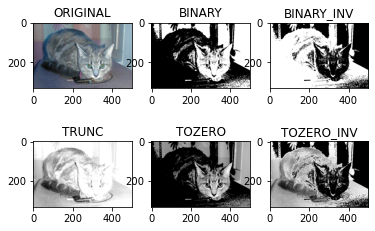

In [21]:
ret ,thresh1 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
ret2 ,thresh2 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY_INV)
ret3 ,thresh3 = cv2.threshold(img_gray,127,255,cv2.THRESH_TRUNC)
ret4 ,thresh4 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO)
ret5 ,thresh5 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO_INV)

title = ['ORIGINAL','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(len(title)):
    # plt.subplot() 三个参数，第一个参数为行数，第二个参数为列数，第三个参数为索引
    plt.subplot(2,3,i+1) , plt.imshow(images[i],'gray')
    plt.title(title[i])
plt.show()

#### 图像平滑

In [22]:
# 图像添加椒盐噪声
def PepperandSalt(src,percetage):
    NoiseImg=src
    NoiseNum=int(percetage*src.shape[0]*src.shape[1])
    for i in range(NoiseNum):
        randX=random.randint(0,src.shape[0]-1)
        randY=random.randint(0,src.shape[1]-1)
        if random.randint(0,1)<=0.5:
            NoiseImg[randX,randY]=0
        else:
            NoiseImg[randX,randY]=255          
    return NoiseImg

In [42]:
lena = cv2.imread('images/lena.jpg')
noiselena = PepperandSalt(lena,0.01)

In [44]:
cv2.imshow('noise',noiselena)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [45]:
# 均值滤波
# 简单的平均卷积操作
# 通常情况下都用奇数来计算
# blur函数的参数： 1、目标图像 2、卷积核大小
blur = cv2.blur(noiselena,(3,3))

cv2.imshow('noise',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
# 方框滤波
# 基本和均值一样，可以选择归一化
# 做归一化的方框滤波和均值滤波是一样的
box = cv2.boxFilter(noiselena,-1,(3,3),normalize=True)
cv2.imshow('noise',box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
# 方框滤波
# 基本和均值一样，可以选择归一化
# 做归一化的方框滤波和均值滤波是一样的
box = cv2.boxFilter(noiselena,-1,(3,3),normalize=False)
cv2.imshow('noise',box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
# 高斯滤波
# 高斯模糊的卷积核里的数值是高斯分布，相当于更重视中间的
assusian = cv2.GaussianBlur(noiselena,(5,5),1)

cv2.imshow('assusian',assusian)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
# 中值滤波
# 用中值做代替
median = cv2.medianBlur(noiselena,5)

cv2.imshow('media',median)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [54]:
# 展示所有的
res = np.hstack((blur,assusian,median))
cv2.imshow('vs',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

